In [27]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
module_root = '..'
import sys,os
sys.path.append(module_root)
from project.settings import PROSTATE_3_0_T_FOLDER 
from ipywidgets import interact
import glob

In [28]:
print(PROSTATE_3_0_T_FOLDER)

/media/mehrtash/mehrtash/Dropbox (Partners HealthCare)/Prostate/Prostate-Zonal-Segmentation/intermediate/NRRD-3-0-T/


In [29]:
nrrd_labels = glob.glob(PROSTATE_3_0_T_FOLDER + '/*_label.nrrd')

In [30]:
def get_arr(path):
    image = sitk.ReadImage(path)
    return sitk.GetArrayFromImage(image)

In [31]:
import SimpleITK as sitk

In [32]:
sample_file = nrrd_labels[0]
sample_arr = get_arr(sample_file)[15,:,:]
sum_arr = np.zeros_like(sample_arr,dtype=np.double)
for nrrd_path in nrrd_labels:
    arr  = get_arr(nrrd_path)
    if arr.shape[1:3] == (320,320):
        arr[arr>0]=1
        for k in range(arr.shape[0]):
            sum_arr += arr[k]
    else:
        print("shape is not the same for:{}".format(os.path.basename(nrrd_path)))

shape is not the same for:Prostate3T-01-0019_label.nrrd


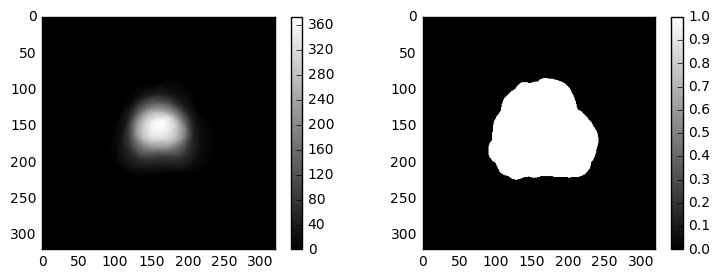

In [33]:
fig = plt.figure(figsize=(9, 3));
plt.subplot(121)
ax = plt.imshow(sum_arr,cmap=plt.cm.gray,interpolation=None)
fig.colorbar(ax)
sum_t = np.zeros_like(sum_arr)
sum_t[sum_arr>0] = 1
#
plt.subplot(122)
ax = plt.imshow(sum_t,cmap=plt.cm.gray,interpolation=None)
fig.colorbar(ax)

In [34]:
def bounding_box(arr):
    a = np.where(arr != 0)
    if a[0].size and a[1].size:
        return np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])

In [35]:
a,b,c,d = bounding_box(sum_t)
print(a,b,c,d)

85 224 90 240


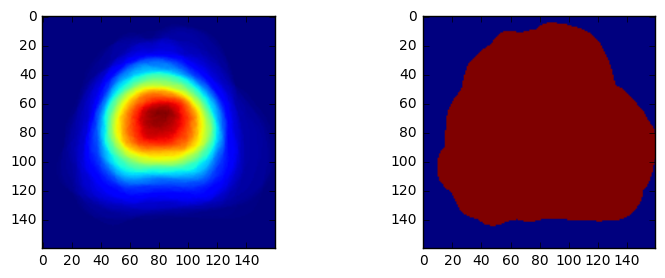

In [36]:
offset =  80
fig = plt.figure(figsize=(9, 3));
plt.subplot(121)
plt.imshow(sum_arr[offset:-offset,offset:-offset])
plt.subplot(122)
plt.imshow(sum_t[offset:-offset,offset:-offset])

In [37]:
sample_arr_c = sample_arr[offset:-offset,offset:-offset]

In [38]:
print(sample_arr.size)
print(sample_arr_c.size)

102400
25600


In [39]:
arr = get_arr(sample_file)

In [40]:
pos_count = 0
neg_count = 0
for index, slice_arr in enumerate(arr):
    print('*' * 100)
    print('index: {}'.format(index))
    print(np.sum(slice_arr>0))
    pos_count += np.sum(slice_arr>0)
    print(np.sum(slice_arr==0))
    neg_count += np.sum(slice_arr==0)
    print(bbox(slice_arr))
print("total pos:{0}, total neg:{1}, ratio:{2:0.3f}".format(pos_count,neg_count,pos_count/(neg_count+pos_count)))

****************************************************************************************************
index: 0
0
102400


NameError: name 'bbox' is not defined

In [41]:
def bbox(arr):
    a = np.where(arr != 0)
    if (a[0].size and a[1].size):
        bbox = np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])
        return bbox

total pos:25277, total neg:38876, ratio:0.39


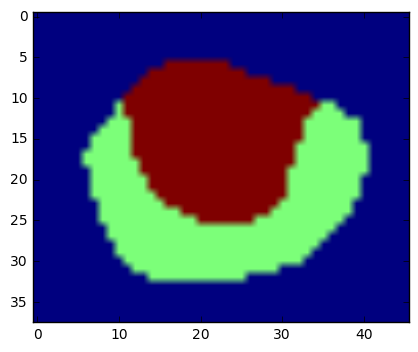

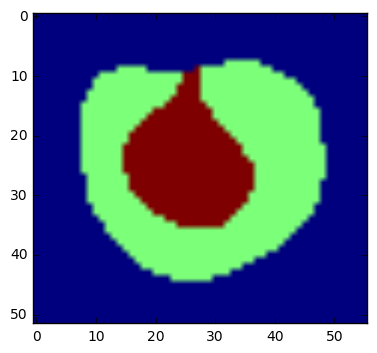

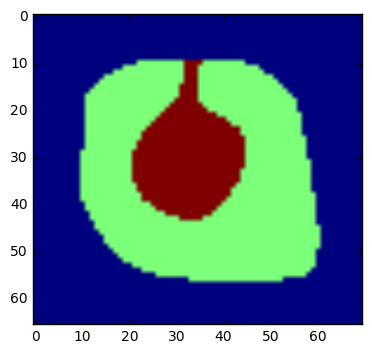

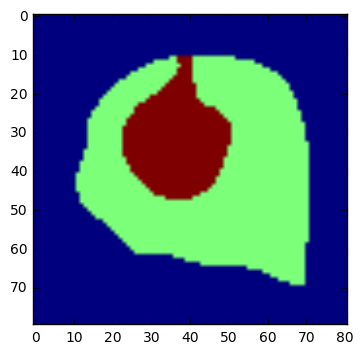

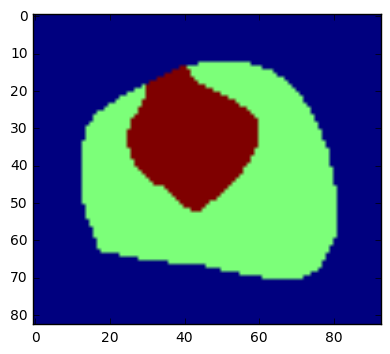

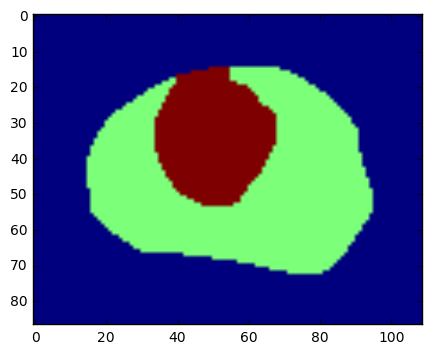

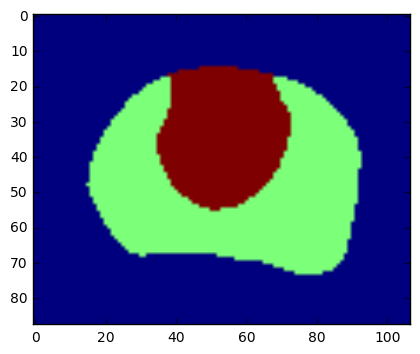

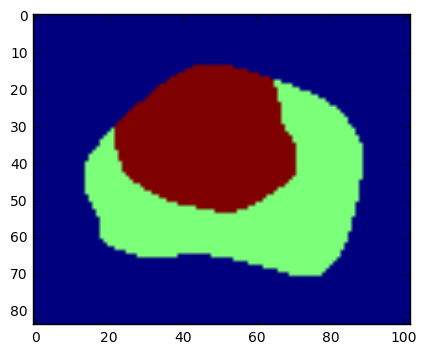

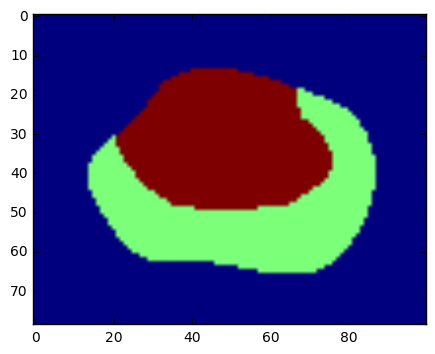

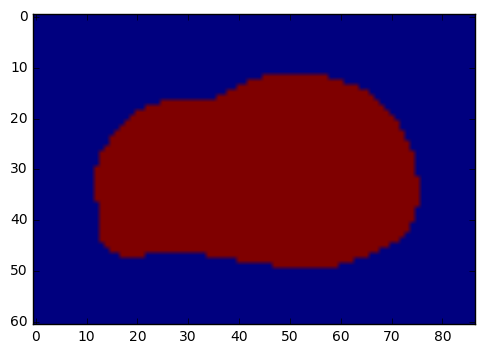

In [42]:
pos_count = 0
neg_count = 0
offset_ratio = 5
for index, slice_arr in enumerate(arr):
    bb = bbox(slice_arr)
    if bb:
        x = max(bb[1]-bb[0],bb[3]-bb[2])
        offset = int(x/offset_ratio)
        slice_arr_c = slice_arr[bb[0]-offset:bb[1]+offset,bb[2]-offset:bb[3]+offset]
        pos_count += np.sum(slice_arr_c>0)
        neg_count += np.sum(slice_arr_c==0)
        plt.figure()
        plt.imshow(slice_arr_c)
print("total pos:{0}, total neg:{1}, ratio:{2:0.2f}".format(pos_count,neg_count,pos_count/(neg_count+pos_count)))

In [43]:
x = np.where(slice_arr_c>0)[0]
y = np.where(slice_arr_c>0)[1]

In [44]:
for i,j in zip(x,y):
    print(i,j)

12 45
12 46
12 47
12 48
12 49
12 50
12 51
12 52
12 53
12 54
12 55
12 56
12 57
13 42
13 43
13 44
13 45
13 46
13 47
13 48
13 49
13 50
13 51
13 52
13 53
13 54
13 55
13 56
13 57
13 58
13 59
13 60
14 40
14 41
14 42
14 43
14 44
14 45
14 46
14 47
14 48
14 49
14 50
14 51
14 52
14 53
14 54
14 55
14 56
14 57
14 58
14 59
14 60
14 61
14 62
14 63
15 38
15 39
15 40
15 41
15 42
15 43
15 44
15 45
15 46
15 47
15 48
15 49
15 50
15 51
15 52
15 53
15 54
15 55
15 56
15 57
15 58
15 59
15 60
15 61
15 62
15 63
15 64
15 65
16 36
16 37
16 38
16 39
16 40
16 41
16 42
16 43
16 44
16 45
16 46
16 47
16 48
16 49
16 50
16 51
16 52
16 53
16 54
16 55
16 56
16 57
16 58
16 59
16 60
16 61
16 62
16 63
16 64
16 65
16 66
17 25
17 26
17 27
17 28
17 29
17 30
17 31
17 32
17 33
17 34
17 35
17 36
17 37
17 38
17 39
17 40
17 41
17 42
17 43
17 44
17 45
17 46
17 47
17 48
17 49
17 50
17 51
17 52
17 53
17 54
17 55
17 56
17 57
17 58
17 59
17 60
17 61
17 62
17 63
17 64
17 65
17 66
17 67
18 22
18 23
18 24
18 25
18 26
18 27
18 28
18 29
18 3

In [47]:
labels = sorted(glob.glob(PROSTATE_3_0_T_FOLDER+ '/*_label.nrrd'))
excluded = ['Prostate3T-01-0019_label.nrrd', ]
print(len(labels))
labels = [label for label in labels if os.path.basename(label) not in excluded]
print(len(labels))
n_total = len(labels)
print('-' * 100)
print("no of 3.0T labels: {}".format(n_total))
'''Selecting test data
sorted(np.random.choice(30, 10,False))
Out[8]:
[0, 2, 3, 13, 17, 20, 22, 23, 26, 27]'''
# test_index is hard coded.(Generated as above)
test_index = [0, 2, 3, 13, 17, ]
test_labels = [labels[i] for i in test_index]
train_val_label_files = list(set(labels) - set(test_labels))

30
29
----------------------------------------------------------------------------------------------------
no of 3.0T labels: 29


In [62]:
cg = 0
pz = 0
for filename in train_val_label_files:
    arr = get_arr(filename)
    _, counts = np.unique(arr,return_counts=True)
    pz += counts[1]
    cg += counts[2]

In [65]:
pz/(cg+pz)

0.18742870310810575

In [69]:
print('pz with label 1 acounts for {0:.02f} of total gland'.format(pz/(cg+pz)))
print('cg with label 2 acounts for {0:.02f} of total gland'.format(cg/(cg+pz)))

pz with label 1 acounts for 0.19 of total gland
cg with label 2 acounts for 0.81 of total gland
